**Step-by-Step EDA on Heart Disease Dataset**

Today we are going to explore the **Heart Disease Dataset** step by step using Python.

We will:

- Load and understand the data
- Explore individual features (Univariate Analysis)
- Explore relationships between features (Bivariate and Multivariate Analysis)
- Handle missing values
- Check data quality using assert statements
- Detect outliers
- Summarize key findings


Heart disease or Cardiovascular disease (CVD) is a class of diseases that involve the heart or blood vessels. CVDs are the leading cause of death globally, accounting for 17.9 million deaths (32.1%) in 2015. While death rates have declined in developed countries since the 1970s, they have increased in developing nations.

This notebook walks through a detailed Exploratory Data Analysis (EDA) of a heart disease dataset, aiming to understand its structure, spot patterns, and prepare the data for further analysis.


**What is Exploratory Data Analysis (EDA)?**

**Exploratory Data Analysis (EDA)** is the first and most important step in any data analysis or machine learning project. It helps us understand the dataset, find patterns, detect outliers, and prepare the data for modeling.

---

# Introduction to EDA

When we get a new dataset, we often ask:

- What is the distribution of the data?
- Are there any missing values, outliers, or anomalies?
- What assumptions are present in the dataset?
- Are there any relationships between variables?
- Is the dataset ready for machine learning?
- Which algorithm might work best on this dataset?

The answer to these questions is **EDA**. It gives us a clear picture of the dataset before any modeling.



# Objectives of EDA

The key goals of EDA are:

1. Understand the distribution of the data.
2. Identify missing values, outliers, or anomalies.
3. Discover relationships between variables.
4. Validate assumptions before modeling.



# Types of EDA

EDA techniques can be divided in two ways:
- **Graphical** vs **Non-Graphical**
- **Univariate** vs **Multivariate**

## Univariate Non-Graphical EDA
- Focuses on one variable.
- Uses summary statistics (mean, median, mode, etc.).
- Detects outliers and unusual values.

## Multivariate Non-Graphical EDA
- Compares two or more variables.
- Uses correlation, cross-tabulation, etc.

## Univariate Graphical EDA
- Uses visual tools like histograms, bar plots, pie charts.
- Helps understand individual variable distributions.

## Multivariate Graphical EDA
- Visual tools for variable interactions like:
  - Side-by-side boxplots
  - Scatter plots
  - Heatmaps
  - Pair plots


Now that we understand what EDA is, let’s begin the practical analysis by importing the required libraries.


## Importing Required Libraries
We import the necessary libraries:
- `numpy` for numerical operations
- `pandas` for data handling
- `matplotlib.pyplot` and `seaborn` for data visualization

In [1]:
# Import libraries
import numpy as np  # Linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline 

sns.set(style='whitegrid')

In [2]:
# ignore warnings

import warnings
warnings.filterwarnings('ignore')

I have imported the libraries. The next step is to import the datasets.

# Import Dataset
will import the dataset with the usual pandas read_csv() function which is used to import CSV (Comma Separated Value) files.

In [4]:
df=pd.read_csv("C:\\Users\\LAHARI\\OneDrive\\Desktop\\FSDS\\EDA\\Dataset\\heart.csv")

# Exploratory Data Analysis

## Check shape of the dataset 
It is a good idea to first check the shape of the dataset.

In [5]:
# print the shape
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (303, 14)


Now, we can see that the dataset contains 303 instances and 14 variables.

## Preview the dataset 

In [83]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [85]:
df.shape

(303, 14)

In [87]:
# print the shape
print('The shape of the dataset:',df.shape)

The shape of the dataset: (303, 14)


In [89]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [91]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## View Column names

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Dataset Information
We check the structure of the dataset: number of rows, columns, data types, and null values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Dataset description**

The dataset contains several columns which are as follows -

  - age : age in years
  - sex : (1 = male; 0 = female)
  - cp : chest pain type
  - trestbps : resting blood pressure (in mm Hg on admission to the hospital)
  - chol : serum cholestoral in mg/dl
  - fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  - restecg : resting electrocardiographic results
  - thalach : maximum heart rate achieved
  - exang : exercise induced angina (1 = yes; 0 = no)
  - oldpeak : ST depression induced by exercise relative to rest
  - slope : the slope of the peak exercise ST segment
  - ca : number of major vessels (0-3) colored by flourosopy
  - thal : 3 = normal; 6 = fixed defect; 7 = reversable defect
  - target : 1 or 0

The above df.info() command gives us the number of filled values along with the data types of columns.

If we simply want to check the data type of a particular column, we can use the following command.

In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## Important Points About the Dataset

Some variables in the dataset are stored as numbers (integers), but they actually represent categories. These should be considered **categorical variables**, not numerical.

Let’s look at a few examples:

- **sex**  
  - Values: `1 = male`, `0 = female`  
  - This is actually a character variable (categorical), but it's stored as `int64`.

- **fbs** *(fasting blood sugar)*  
  - Values: `1 = true`, `0 = false`  
  - Although it represents true/false, it's stored as `int64`. It should be treated as a categorical variable.

- **exang** *(exercise-induced angina)*  
  - Values: `1 = yes`, `0 = no`  
  - Again, this is categorical but stored as `int64`.

- **target**  
  - Values: `1 = disease`, `0 = no disease`  
  - This is the outcome variable and also categorical, but stored as `int64`.

**Conclusion:**  
These variables are encoded using numbers, but they should be treated as **categorical (object)** types during analysis or visualization.


## Statistical Summary
Using `.describe()`, we view summary statistics such as mean, min, max, and quartiles for each numeric column.

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Important Points to Note About `df.describe()`**

- The command **`df.describe()`** gives us the **summary statistics** (like mean, std, min, max) of **numerical variables only**. It automatically excludes character (categorical) variables.

---

To view statistics of only character (object) variables:
```python
df.describe(include=['object'])


# Univariate Analysis

**Univariate Analysis – Target Variable (Heart Disease)**

**What is `target`?**

The `target` variable indicates whether a patient has heart disease or not:

- `1` → Patient has heart disease (positive)
- `0` → Patient does **not** have heart disease (negative)

## Number of Unique Values

In [10]:
df['target'].nunique()

2

This checks how many distinct values the column contains. Output should be 2.

## View Unique Values

In [12]:
df['target'].unique()
# Expected output: array([1, 0], dtype=int64)

array([1, 0])

## Frequency Distribution

**Interpretation:**

- 165 patients have heart disease (target = 1)

- 138 patients do not have heart disease (target = 0)



In [13]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

## Visualize Frequency Distribution
We use a count plot to visualize the number of patients with (`target = 1`) and without (`target = 0`) heart disease.

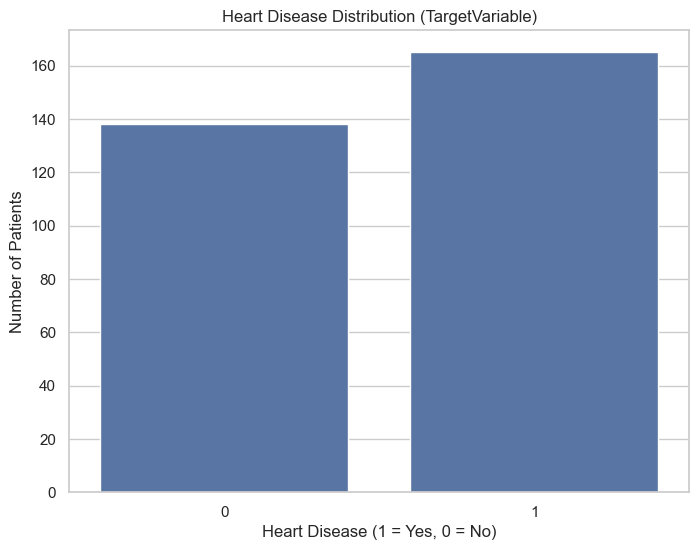

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns 

f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target',data=df)
plt.title('Heart Disease Distribution (TargetVariable)')  
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Number of Patients')
plt.show()

**This confirms:**

- 165 patients have heart disease

- 138 do not


**Target Variable with Other Features**

## Frequency Distribution of Target by Sex

In [16]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: count, dtype: int64

sex = 1 → Male

sex = 0 → Female

**From data:**

- Out of 96 females, 72 have heart disease, 24 do not

- Out of 207 males, 93 have heart disease, 114 do not

## Visualize with Countplot(Sex vs Target) 


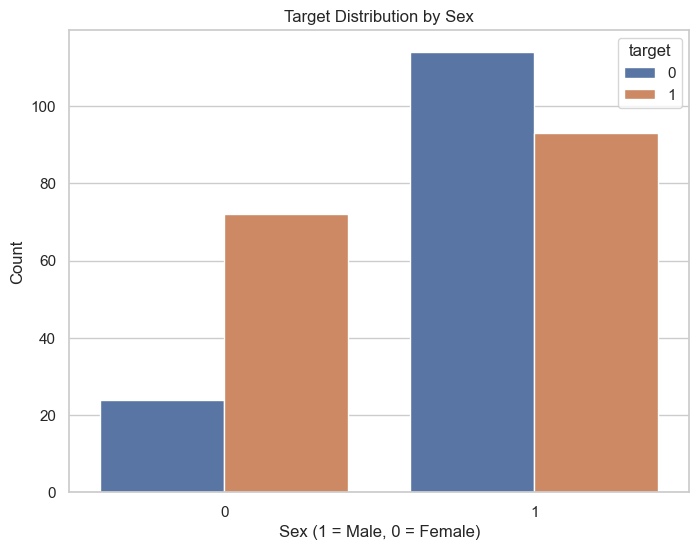

In [17]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x="sex",hue="target",data=df)
plt.title('Target Distribution by Sex') 
plt.xlabel('Sex (1 = Male, 0 = Female)')
plt.ylabel('Count')
plt.show()

**Interpretation:**
  
You can see heart disease distribution across male and female patients.


## Alternate Visualization - Side-by-Side Columns

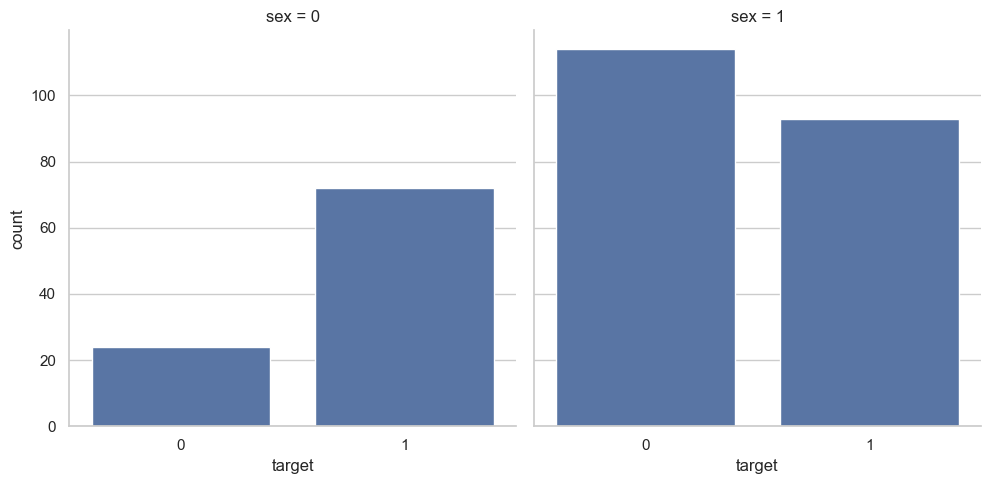

In [18]:
ax=sns.catplot(x="target",col="sex",data=df,kind="count",height=5,aspect=1)
plt.show()

Easier to interpret with clear separation for male and female.

## Horizontal Bars
We use a count plot to visualize the number of patients with (`target = 1`) and without (`target = 0`) heart disease.

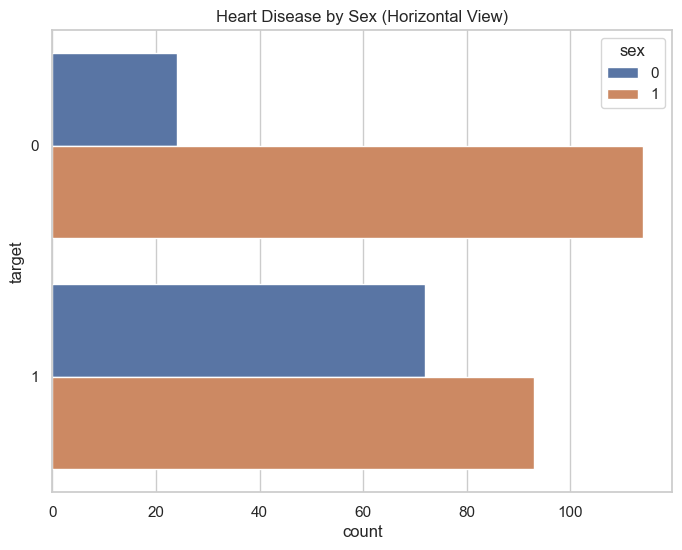

In [19]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(y='target',hue='sex',data=df)
plt.title('Heart Disease by Sex (Horizontal View)')
plt.show()

## Use Different Color Palette
We use a count plot to visualize the number of patients with (`target = 1`) and without (`target = 0`) heart disease.

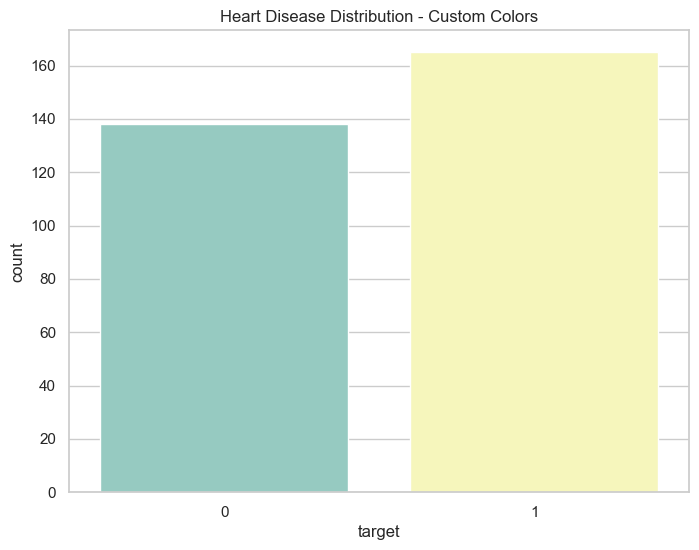

In [20]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target',data=df,palette='Set3')
plt.title('Heart Disease Distribution - Custom Colors')
plt.show()

## Stylish Edge with plt.bar look

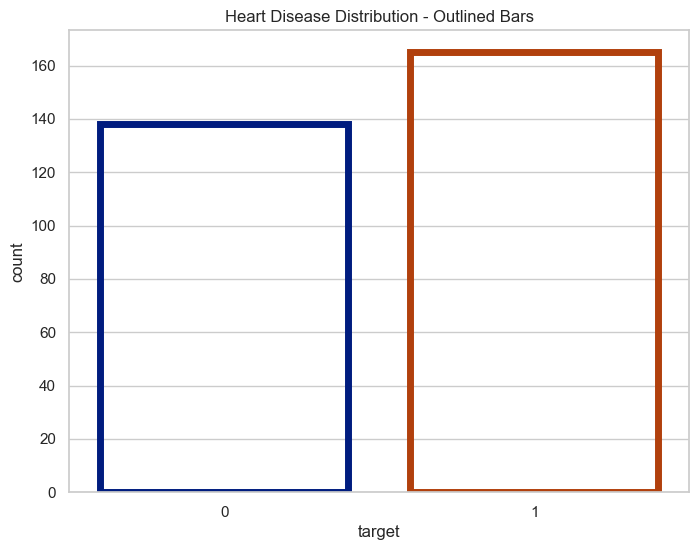

In [21]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(
    x='target',
    data=df,
    facecolor=(0,0,0,0),
    linewidth=5,
    edgecolor=sns.color_palette('dark',3)
)
plt.title('Heart Disease Distribution - Outlined Bars')
plt.show()

## Target Distribution vs fbs (Fasting Blood Sugar)


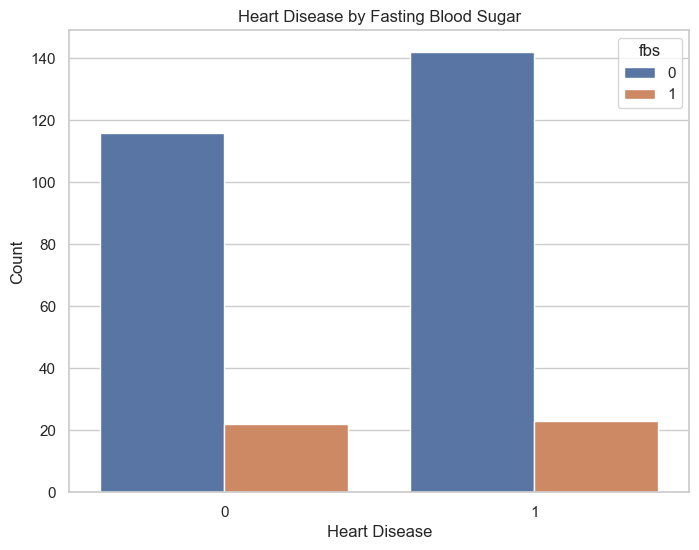

In [22]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target',hue='fbs',data=df)
plt.title('Heart Disease by Fasting Blood Sugar')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

## Target Distribution vs exang (Exercise-Induced Angina)


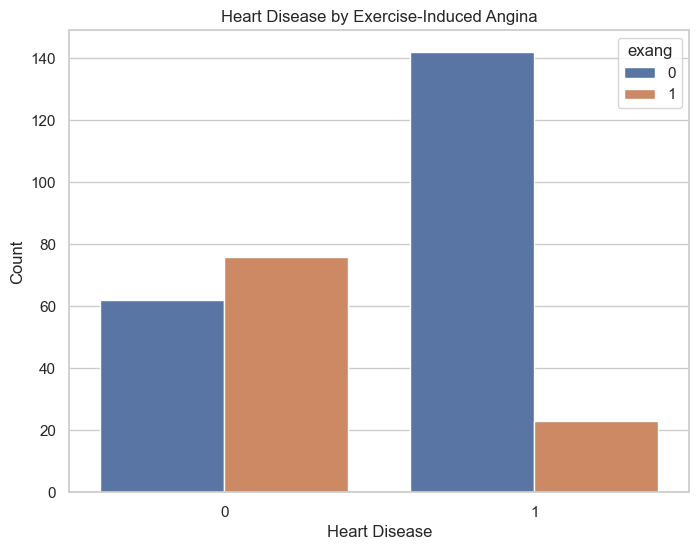

In [23]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target',data=df,hue='exang')
plt.title('Heart Disease by Exercise-Induced Angina')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

**Summary of Univariate Findings**

- target is our key variable indicating heart disease (1 = Yes, 0 = No)

- 165 patients have heart disease

- 138 patients do not have heart disease

- Among 96 females:
  -  72 have heart disease
  - 24 do not

- Among 207 males:
  - 93 have heart disease
  - 114 do not

- We also explored heart disease patterns by fbs and exang.

# Bivariate Analysis – Correlation with Target

## Estimate Correlation Coefficients

We will calculate Pearson's correlation coefficient between all numeric features using:


In [26]:
correlation=df.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## Correlation with Target
Let’s view how other features correlate with the target variable:

In [27]:
correlation['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

**Interpretation of Correlation Coefficient**

 - +1 → Strong positive correlation

 - 0 → No correlation

- -1 → Strong negative correlation

**Findings:**

- No variable has a strong positive or negative correlation with target.

- cp (chest pain type) and thalach (maximum heart rate) show mild positive correlation.

- fbs (fasting blood sugar) shows no correlation.



## Analysis of cp (Chest Pain Type)

### Check Unique Values

In [28]:
df['cp'].nunique()

4

### Frequency Distribution

In [29]:
df['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

Values: 0, 1, 2, 3 → Different types of chest pain

### Visualize cp Distribution

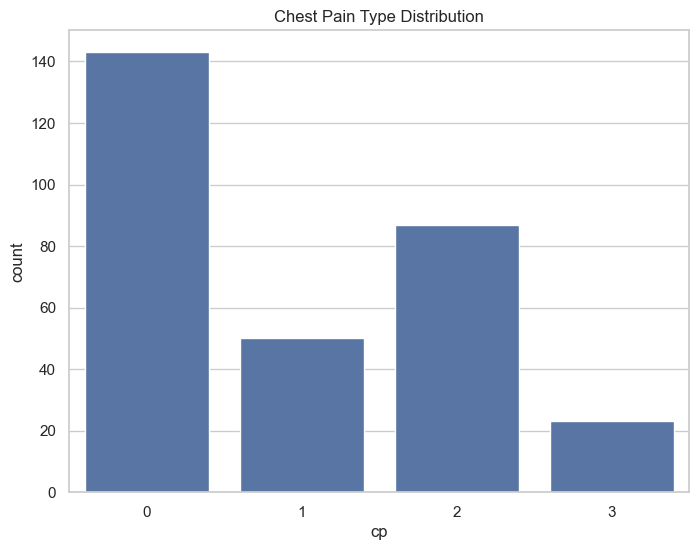

In [30]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='cp',data=df)
plt.title('Chest Pain Type Distribution')
plt.show()

### target vs cp

In [31]:
df.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: count, dtype: int64

This groups heart disease presence across different chest pain types.

### Visualize target by cp

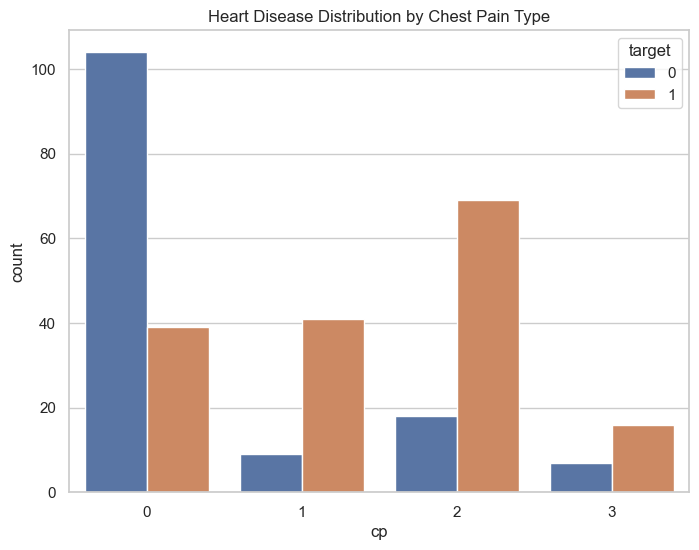

In [32]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='cp',data=df,hue='target')
plt.title('Heart Disease Distribution by Chest Pain Type')
plt.show()

###  Alternate: target vs cp – Column Format

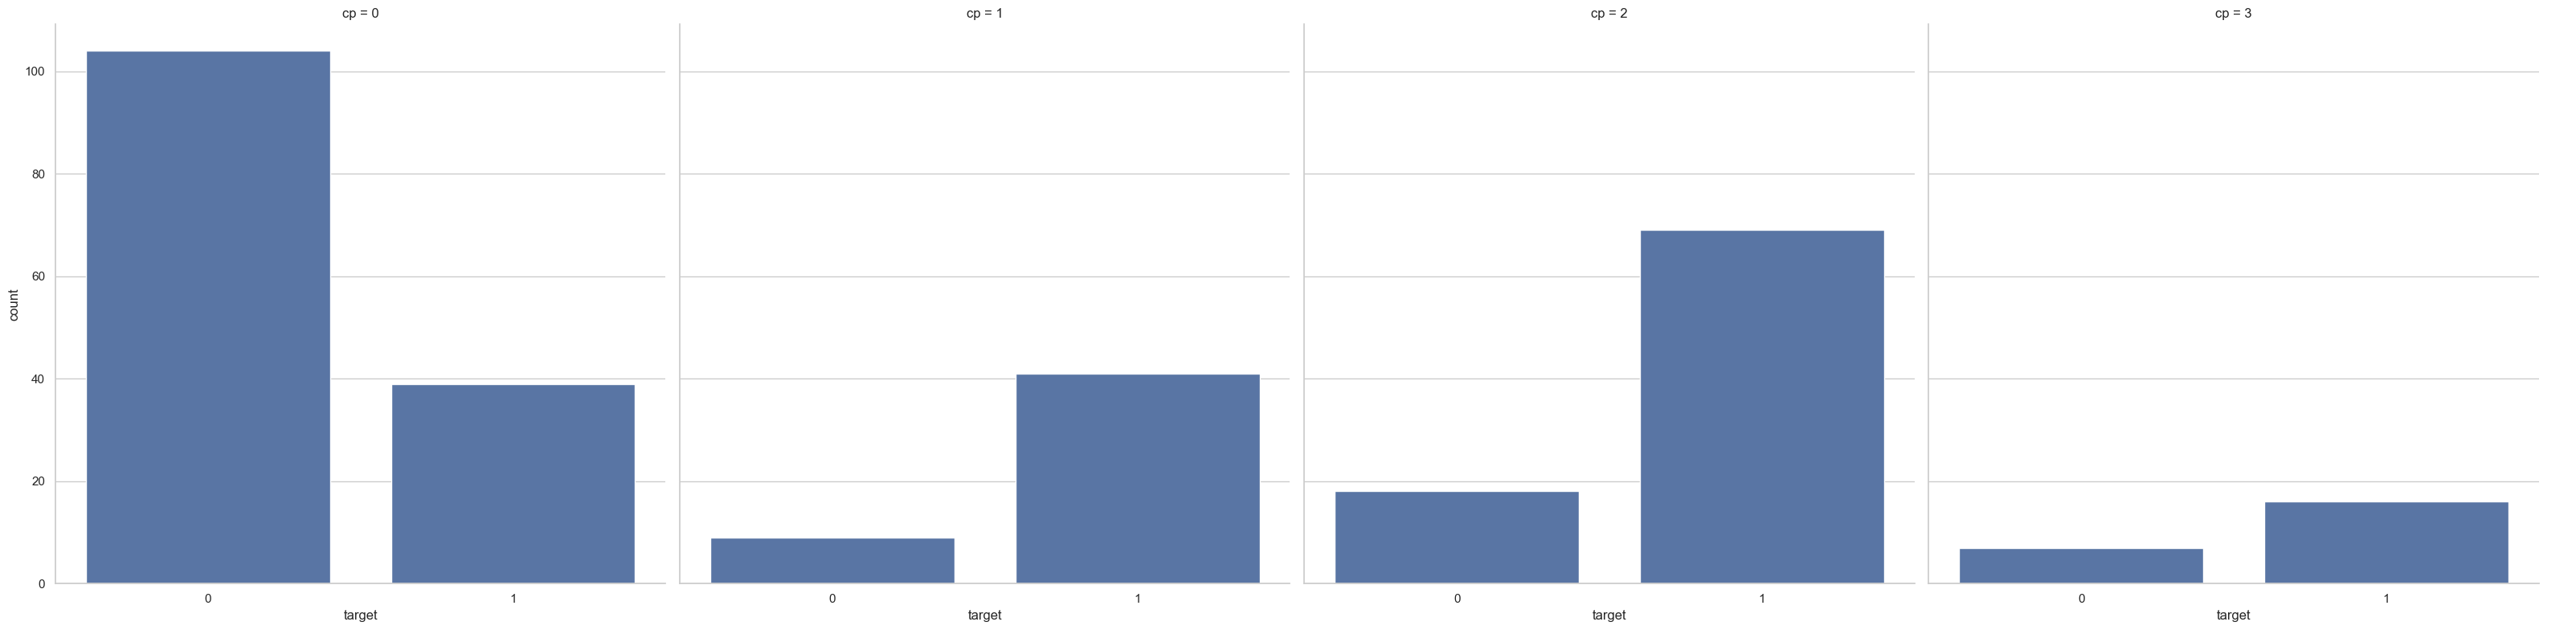

In [33]:
ax=sns.catplot(x='target',col='cp',data=df,kind='count',height=8,aspect=1)
plt.show()

## Analysis of thalach (Max Heart Rate)

### Unique Values

In [34]:
df['thalach'].nunique()

91

Output: 91 (Continuous numeric feature)

### Visualize Distribution (Histogram + KDE)

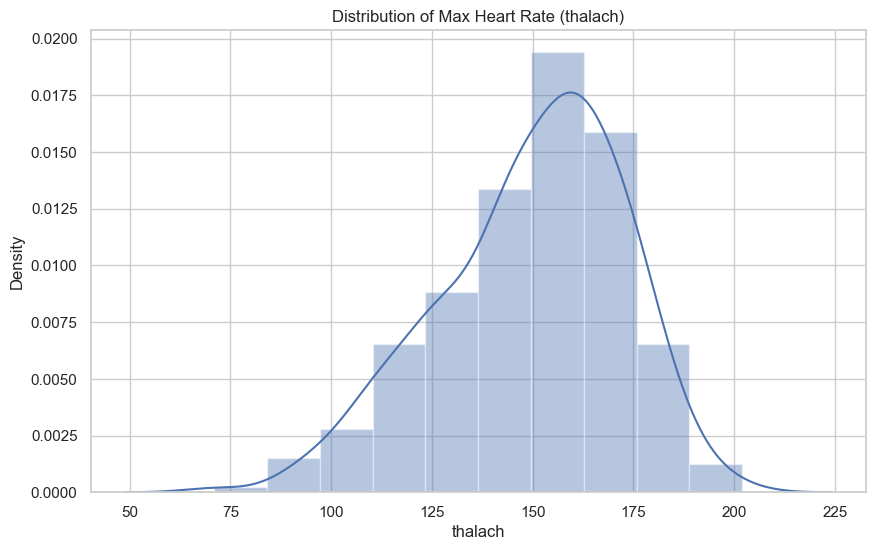

In [35]:
f,ax=plt.subplots(figsize=(10,6))
x=df['thalach']
ax=sns.distplot(x,bins=10)
plt.title('Distribution of Max Heart Rate (thalach)')
plt.show()

### Pandas Series Label

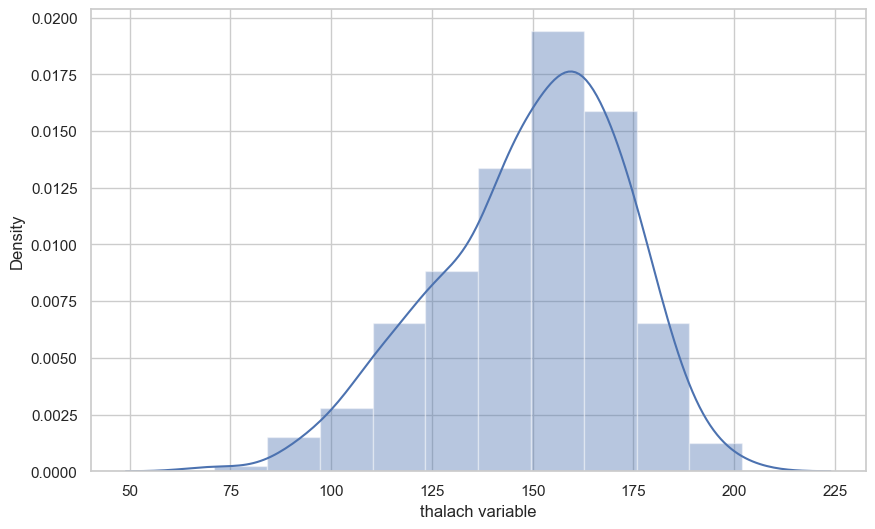

In [36]:
f,ax=plt.subplots(figsize=(10,6))
x=df['thalach']
x=pd.Series(x,name='thalach variable')
ax=sns.distplot(x,bins=10)
plt.show()

### Vertical Histogram

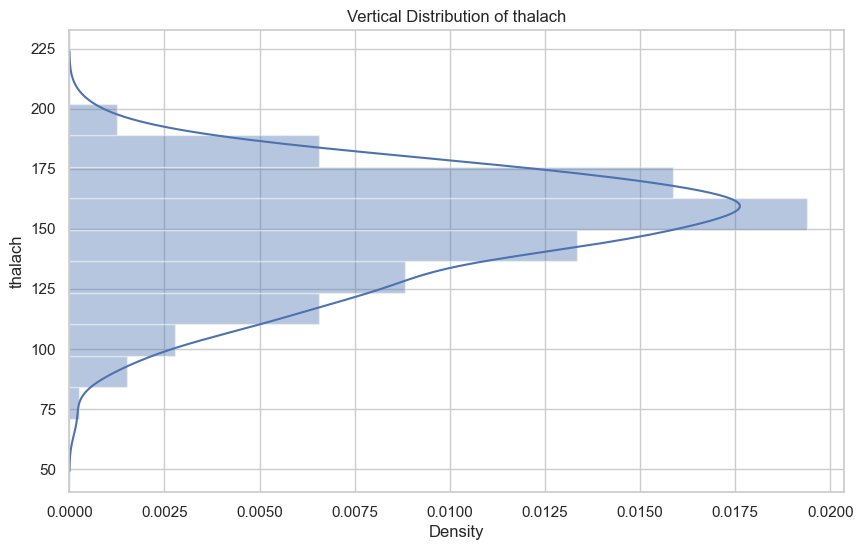

In [37]:
f,ax=plt.subplots(figsize=(10,6))
x=df['thalach']
ax=sns.distplot(x,bins=10,vertical=True)
plt.title('Vertical Distribution of thalach')
plt.show()

### KDE Plot (Smooth Curve)

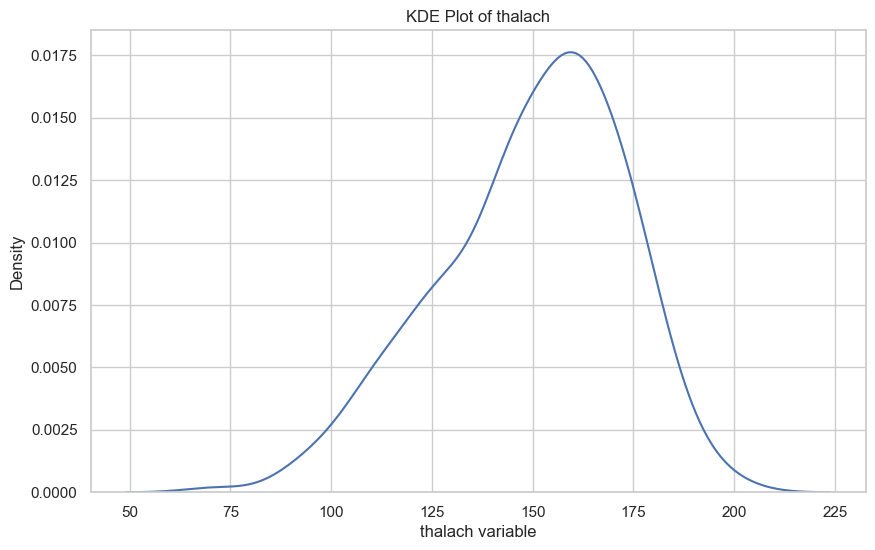

In [38]:
f,ax=plt.subplots(figsize=(10,6))
x=df['thalach']
x=pd.Series(x,name='thalach variable')
ax=sns.kdeplot(x)
plt.title('KDE Plot of thalach')
plt.show()

### Shaded KDE Plot

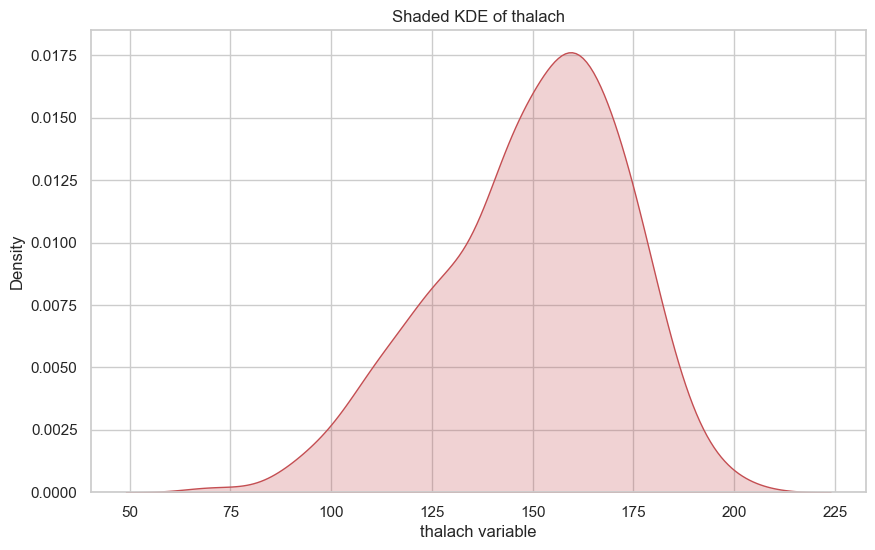

In [39]:
f,ax=plt.subplots(figsize=(10,6))
x=df['thalach']
x=pd.Series(x,name='thalach variable')
ax=sns.kdeplot(x,shade=True,color='r')
plt.title('Shaded KDE of thalach')
plt.show()

### Histogram (No KDE, With Rug)

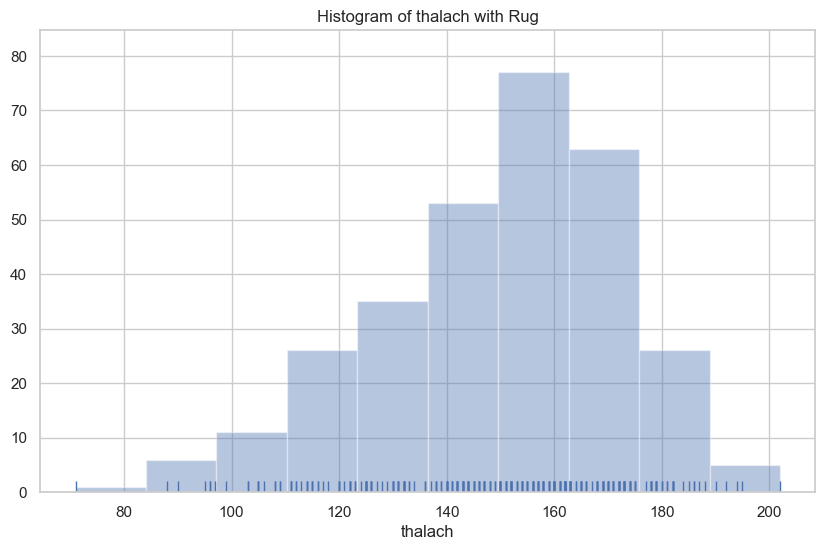

In [40]:
f,ax=plt.subplots(figsize=(10,6))
x=df['thalach']
ax=sns.distplot(x,kde=False,rug=True,bins=10)
plt.title('Histogram of thalach with Rug')
plt.show()

### thalach vs target – Strip Plot

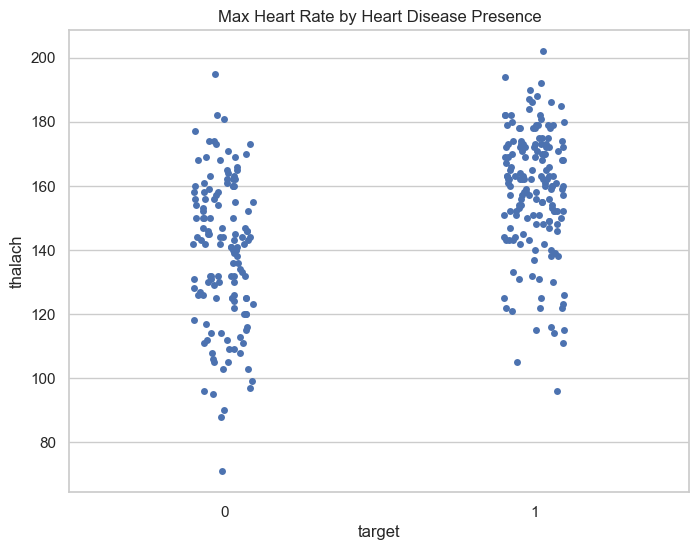

In [41]:
f,ax=plt.subplots(figsize=(8,6))
sns.stripplot(x='target',y='thalach',data=df)
plt.title('Max Heart Rate by Heart Disease Presence')
plt.show()


### Strip Plot with Jitter

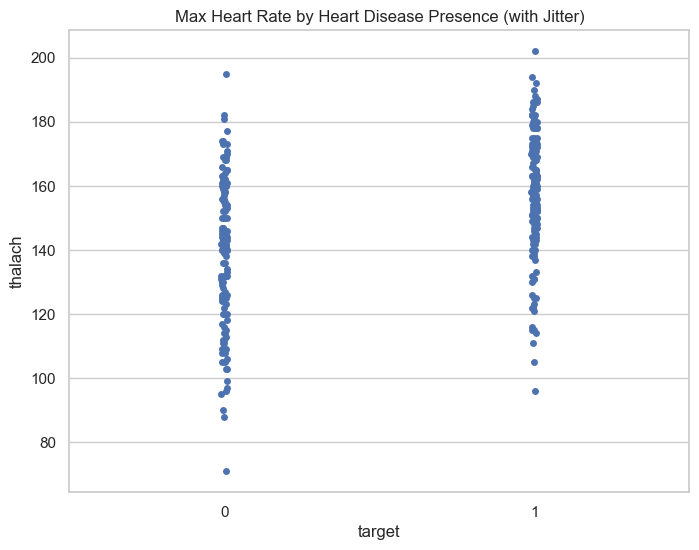

In [42]:
f,ax=plt.subplots(figsize=(8,6))
sns.stripplot(x='target',y='thalach',data=df,jitter=0.01)
plt.title('Max Heart Rate by Heart Disease Presence (with Jitter)')
plt.show()

### Boxplot – thalach vs target

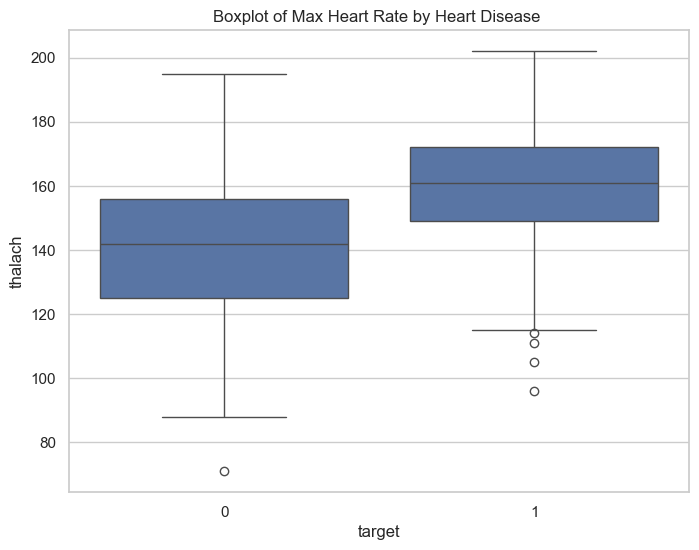

In [43]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x='target',y='thalach',data=df)
plt.title('Boxplot of Max Heart Rate by Heart Disease ')
plt.show()

**Interpretation:**

People with target = 1 (heart disease) tend to have higher max heart rate 

than those with target = 0.



**Findings of Bivariate Analysis**
    
- No features have a strong correlation (either positive or negative) with target.

- cp and thalach show mild positive correlation with heart disease.

- No correlation observed between fbs and target.

- thalach distribution is slightly negatively skewed.

- Patients with heart disease (target = 1) tend to have higher thalach compared to those without heart disease.

- The relationship between chest pain type (cp) and heart disease is clearly visible with categorical plots.

# Multivariate Analysis
The objective of multivariate analysis is to **discover hidden patterns and relationships** between multiple variables in the dataset.


## Correlation Heatmap
We compute and visualize the correlation matrix to see how different features are linearly related to one another.

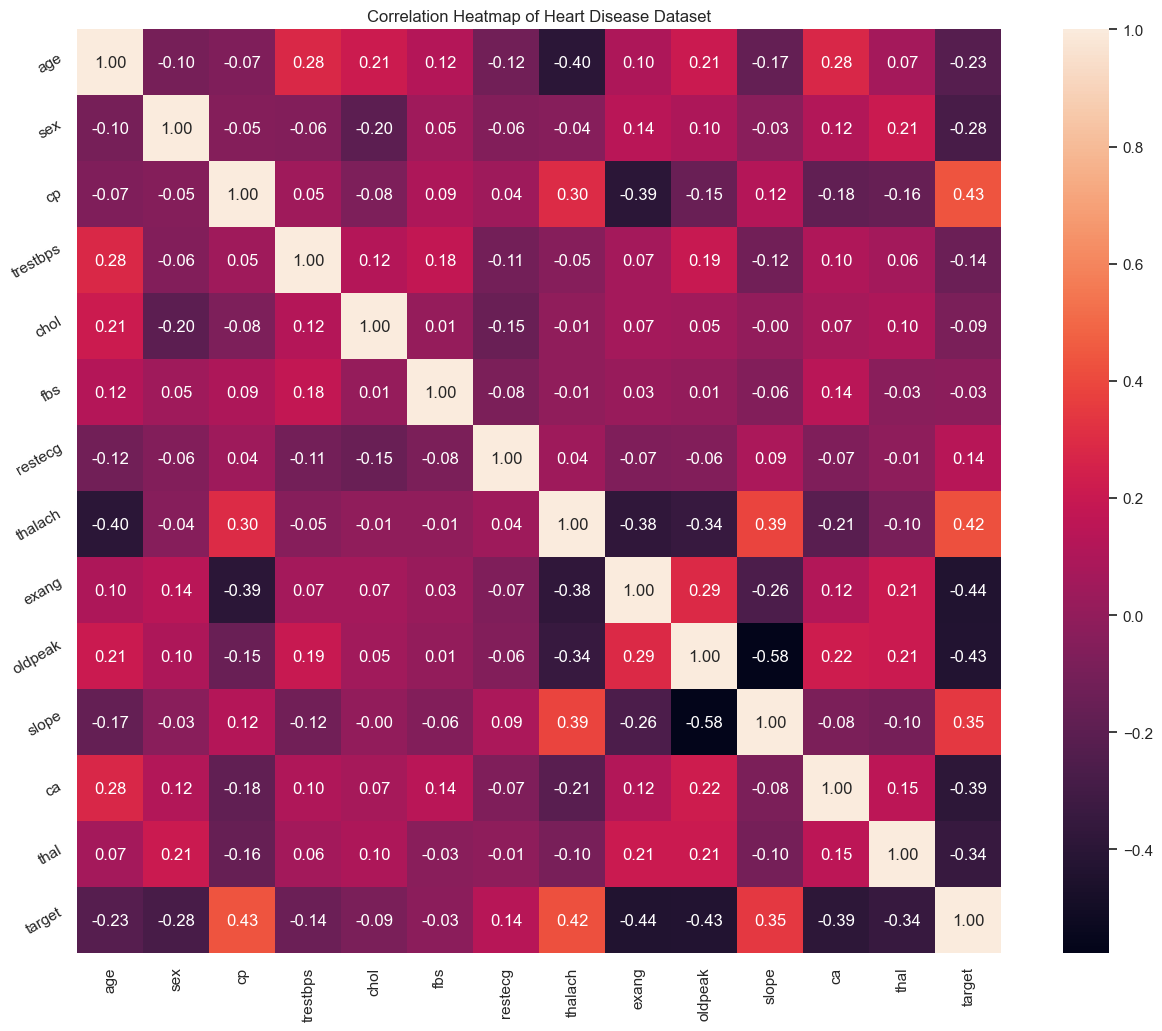

In [44]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Heart Disease Dataset')
a=sns.heatmap(correlation ,square=True,annot=True,fmt='.2f',linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

**Interpretation**
  
From the heatmap:

- target & cp → Mild positive correlation (0.43)

- target & thalach → Mild positive correlation (0.42)

- target & slope → Weak positive correlation (0.35)

- target & exang → Mild negative correlation (-0.44)

- target & oldpeak → Mild negative correlation (-0.43)

- target & ca → Weak negative correlation (-0.39)

- target & thal → Weak negative correlation (-0.34)



## Pair Plot
Define Numerical Variables

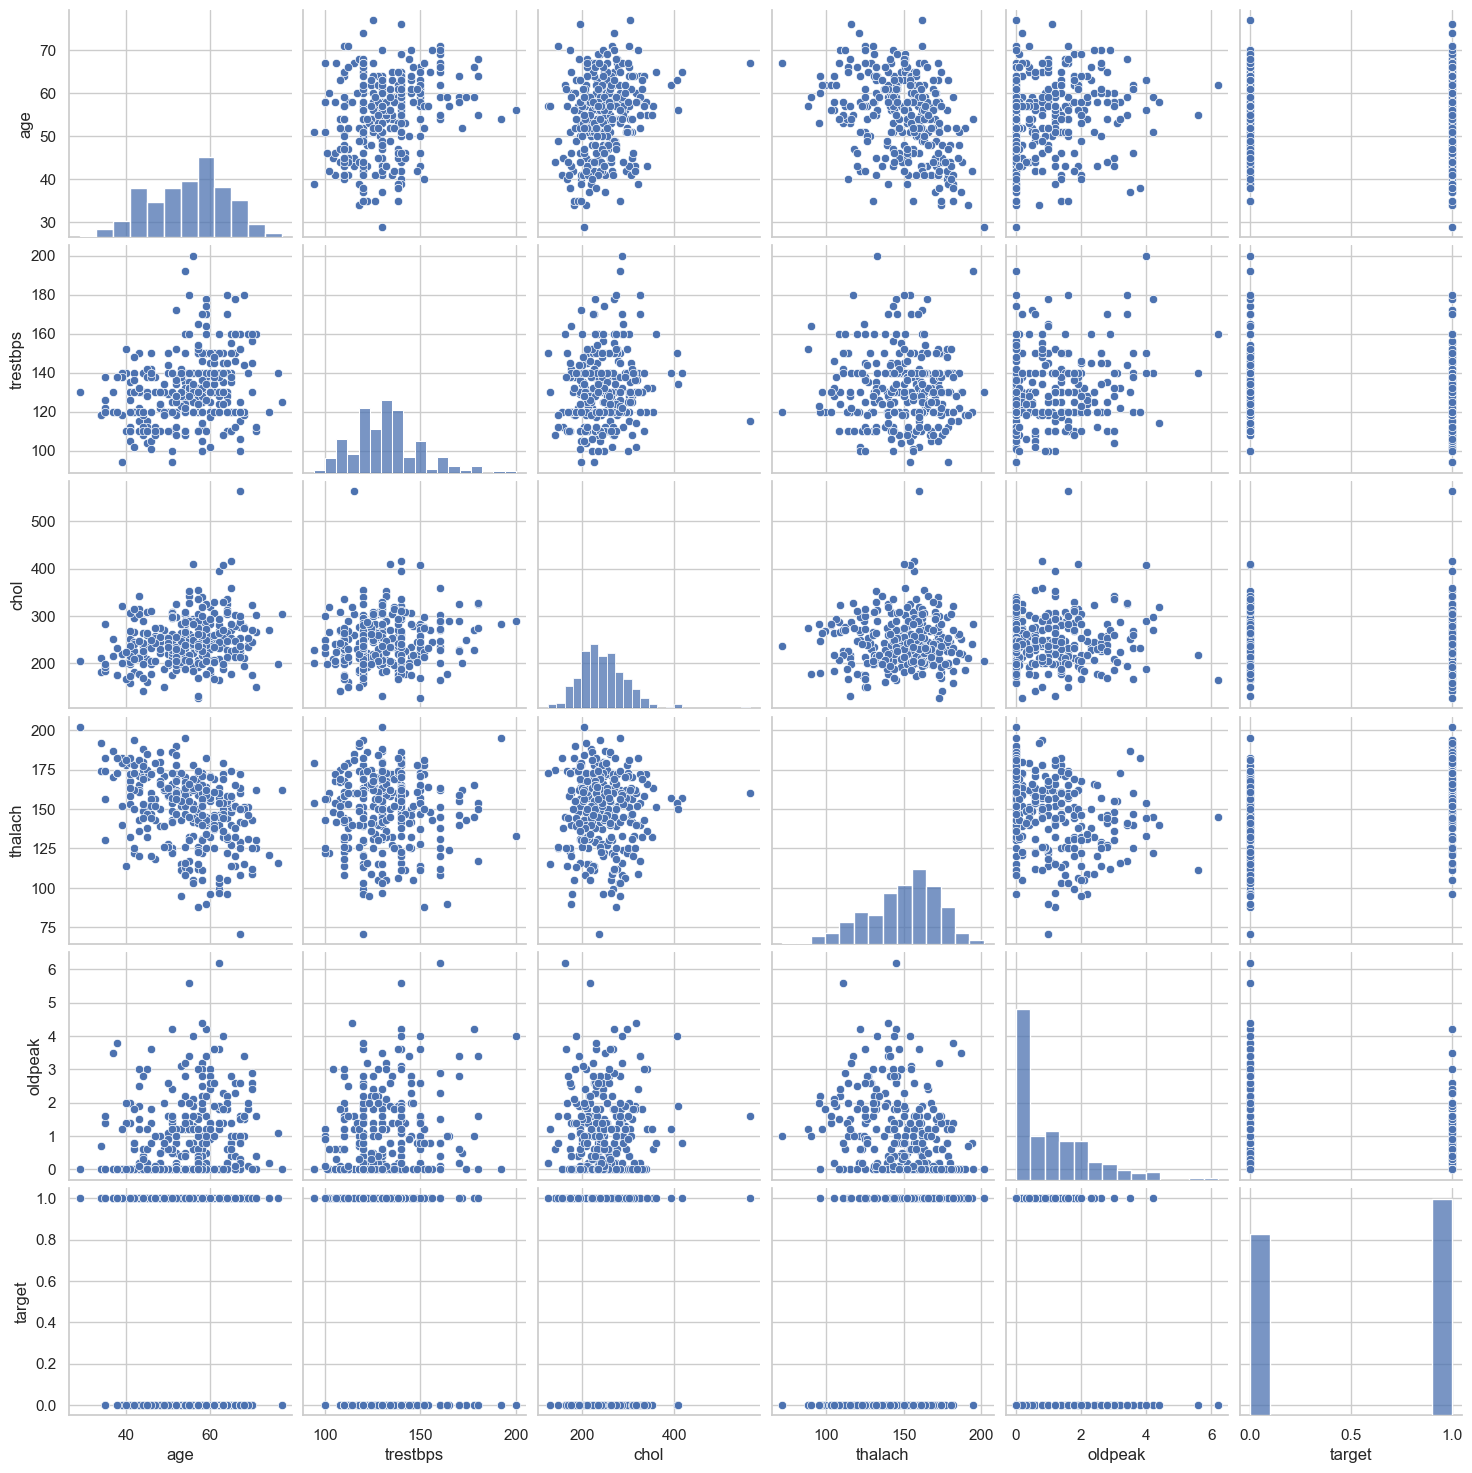

In [45]:
num_var=['age','trestbps','chol','thalach','oldpeak','target']
sns.pairplot(df[num_var],kind='scatter',diag_kind='hist')
plt.show()

We compare interactions among numeric variables and their relationship with target. Helps identify linear or non-linear trends, clusters, and outliers.


## In-Depth Variable Relationships

### Analysis: age Distribution

**Unique Values & Summary**

In [46]:
df['age'].nunique()

41

In [47]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

### Distribution Plot

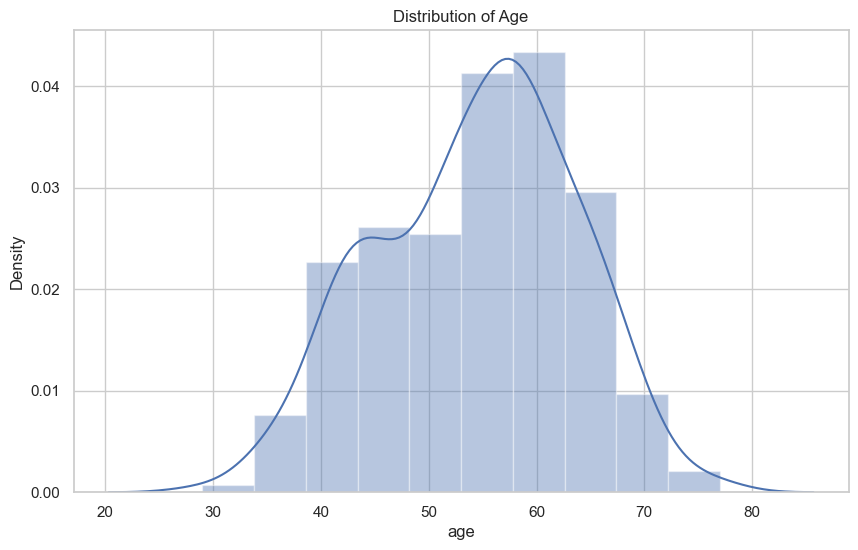

In [48]:
f,ax=plt.subplots(figsize=(10,6))
x=df['age']
ax=sns.distplot(x,bins=10)
plt.title('Distribution of Age')
plt.show()

**Interpretation:**

- Age is approximately normally distributed

- Mean age ≈ 54.37 years

- Range: 29 to 77 years



### Age vs Target

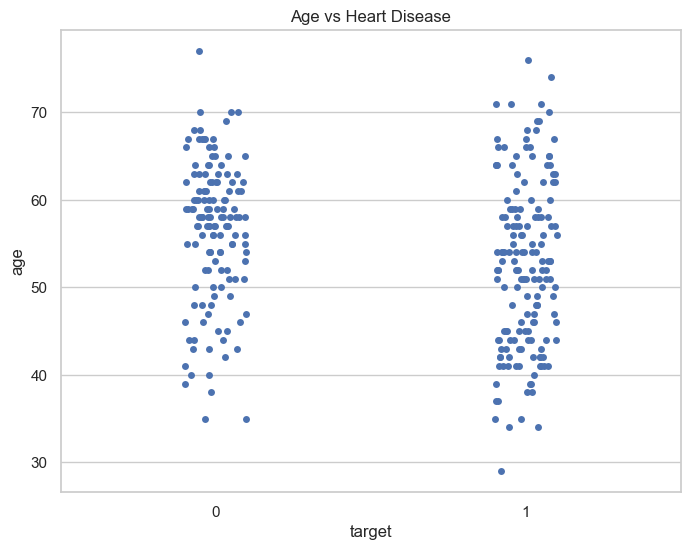

In [49]:
# stripplot
f,ax=plt.subplots(figsize=(8,6))
sns.stripplot(x='target',y='age',data=df)
plt.title('Age vs Heart Disease')
plt.show()

**Interpretation:**
People with and without heart disease have comparable age ranges.

## Boxplot of Age vs Heart Disease
This plot shows how the distribution of age varies between patients with and without heart disease.

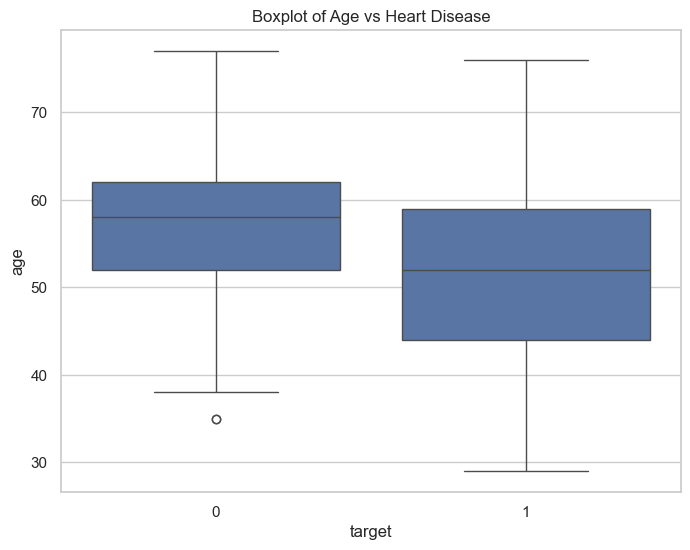

In [50]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x='target',y='age',data=df)
plt.title('Boxplot of Age vs Heart Disease')
plt.show()

**Interpretation:**

- People with heart disease tend to have a lower average age

- Spread of age is higher in people with heart disease

### Age vs Trestbps (Resting BP)

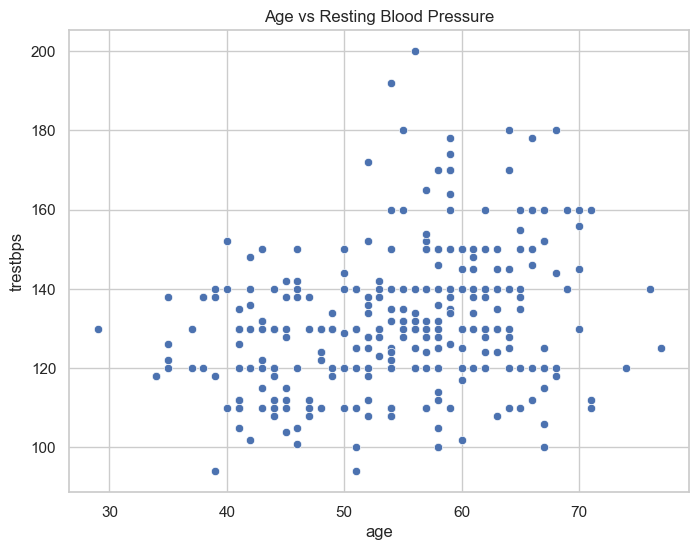

In [51]:
# Scatter Plot
f,ax=plt.subplots(figsize=(8,6))
ax=sns.scatterplot(x='age',y='trestbps',data=df)
plt.title('Age vs Resting Blood Pressure')
plt.show()

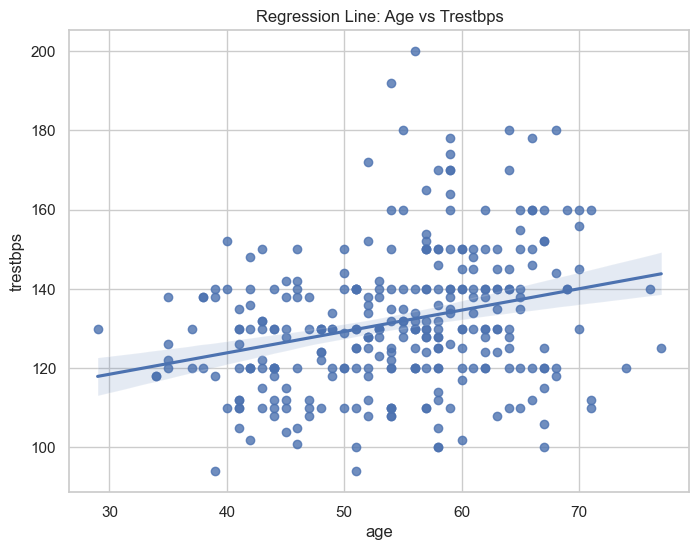

In [52]:
# With Regression Line
f,ax=plt.subplots(figsize=(8,6))
ax=sns.regplot(x='age',y='trestbps',data=df)
plt.title('Regression Line: Age vs Trestbps')
plt.show()

**Interpretation:**
No meaningful correlation between age and resting blood pressure.



## Age vs Chol (Cholesterol)

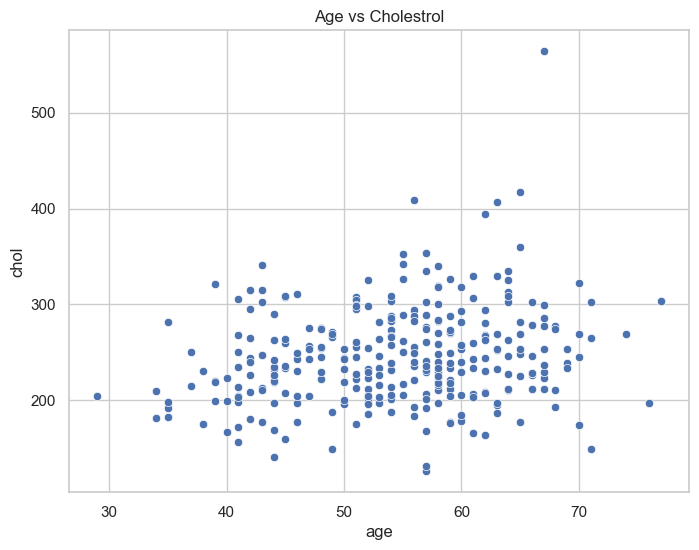

In [53]:
# Scatter Plot
f,ax=plt.subplots(figsize=(8,6))
ax=sns.scatterplot(x='age',y='chol',data=df)
plt.title('Age vs Cholestrol')
plt.show()

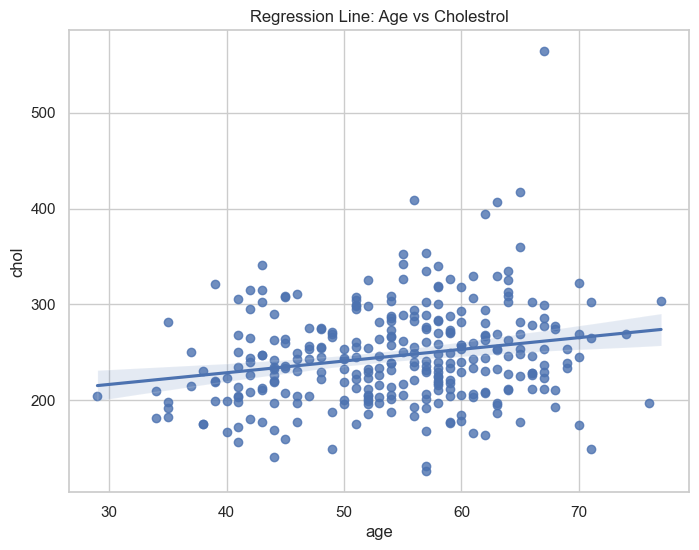

In [54]:
# With Regression Line
f,ax=plt.subplots(figsize=(8,6))
ax=sns.regplot(x='age',y='chol',data=df)
plt.title('Regression Line: Age vs Cholestrol')
plt.show()

**Interpretation:**
Slight positive correlation between age and cholesterol.


## Chol vs Thalach

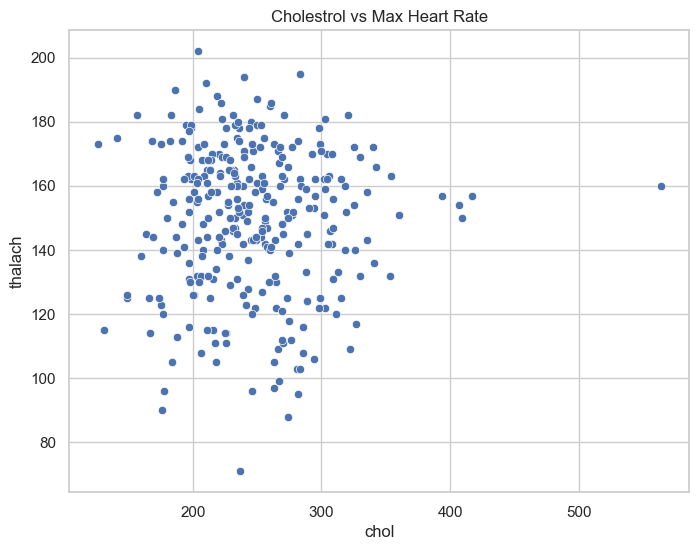

In [55]:
# Scatter Plot
f,ax=plt.subplots(figsize=(8,6))
ax=sns.scatterplot(x='chol',y='thalach',data=df)
plt.title('Cholestrol vs Max Heart Rate')
plt.show()

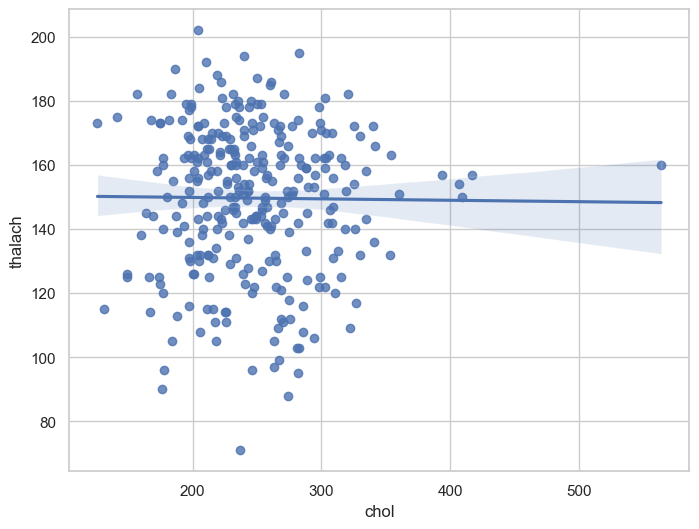

In [231]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.regplot(x='chol',y='thalach',data=df)
plt.show()

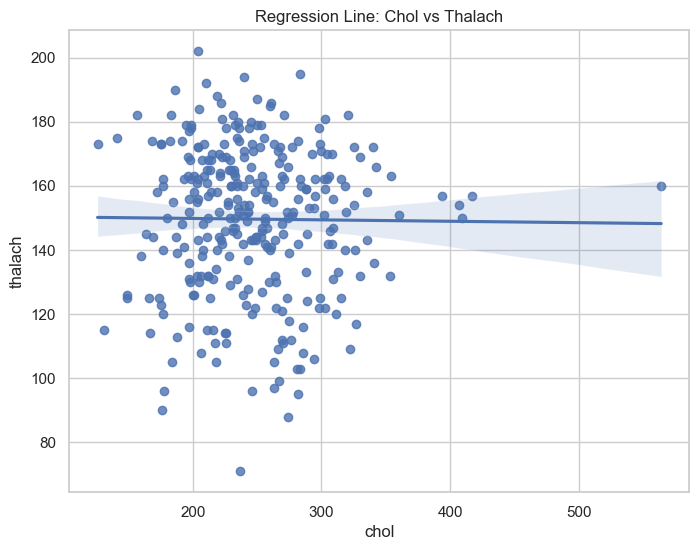

In [56]:
# With Regression Line
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="chol", y="thalach", data=df)
plt.title("Regression Line: Chol vs Thalach")
plt.show()

**Interpretation:**
No visible correlation between cholesterol and max heart rate.

**Summary of Multivariate Analysis**

This table summarizes the strength and direction of relationships between key variables based on the multivariate analysis conducted above.

| **Relationship**         | **Correlation** | **Description**                   |
|--------------------------|-----------------|-----------------------------------|
| `target` & `cp`          | +0.43           | Mild positive correlation         |
| `target` & `thalach`     | +0.42           | Mild positive correlation         |
| `target` & `slope`       | +0.35           | Weak positive correlation         |
| `target` & `exang`       | -0.44           | Mild negative correlation         |
| `target` & `oldpeak`     | -0.43           | Mild negative correlation         |
| `target` & `ca`          | -0.39           | Weak negative correlation         |
| `target` & `thal`        | -0.34           | Weak negative correlation         |
| `age` & `chol`           | ~+0.1           | Slight positive trend             |
| `chol` & `thalach`       | ~0              | No correlation                    |
| `age` & `trestbps`       | ~0              | No correlation                    |


# Dealing with Missing Values


- In **Pandas**, missing data is represented by two values:
  - **`None`**: A Python singleton object used to indicate missing data.
  - **`NaN`**: Stands for *Not a Number*, a special floating-point value used across data systems.

- Pandas provides multiple ways to **detect and handle** missing values.



## Pandas `isnull()` and `notnull()` Functions 

- `isnull()` → Returns `True` if a value is missing (NaN/None), else `False`.

- `notnull()` → Returns `True` if a value is **not** missing.

These functions are essential for filtering or cleaning datasets containing incomplete data.



## Useful Commands to Detect Missing Values

| **Command**                    | **Purpose**                                                                 |
|-------------------------------|------------------------------------------------------------------------------|
| `df.isnull()`                 | Checks each cell → `True` if missing, else `False`.                         |
| `df.isnull().sum()`           | Returns count of missing values in **each column**.                         |
| `df.isnull().sum().sum()`     | Total missing values in the **entire DataFrame**.                          |
| `df.isnull().mean()`          | Returns **percentage** of missing values per column.                        |
| `df.isnull().any()`           | Shows which columns have **any** missing values (`True`/`False`).           |
| `df.isnull().any().any()`     | Returns single `True`/`False` → does any column have missing values?        |
| `df.isnull().values.any()`    | Same as above → returns `True` if **any** missing value exists.             |
| `df.isnull().values.sum()`    | Gives the **total count** of missing values in the dataset.                |


## Check for Missing Values in Our Dataset

In [57]:
# Check missing values per column
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Interpretation:**
The output confirms that there are no missing values in our dataset.

# Check with `assert` Statement

To ensure **data integrity**, we must confirm that:

- There are **no missing values** in the dataset.
- There are **no unexpected 0s or negative values**, depending on context.

Using `assert` statements helps us **programmatically validate assumptions** in the dataset. If the condition is `True`, it does nothing. If `False`, it raises an `AssertionError`.

Understanding `assert`

```python
assert 1 == 1  #  Does nothing (passes silently)

assert 1 == 2  #  Raises AssertionError

## Check : No Missing Values

In [58]:
assert pd.notnull(df).all().all()

This statement checks that no NaN or None values exist in the entire DataFrame.

## Check : All Values Are Greater Than or Equal to 0

In [59]:
assert(df>=0).all().all()

This checks that no negative values exist in the dataset.

**Interpretation**
The above assert statements did not throw any error, which confirms that:

- There are no missing values in the dataset.

- All values are greater than or equal to 0.

# Outlier Detection

We will use **boxplots** to visually detect outliers in the **continuous numerical variables**:

**Variables:**
- `age`
- `trestbps` (Resting Blood Pressure)
- `chol` (Serum Cholesterol)
- `thalach` (Maximum Heart Rate Achieved)
- `oldpeak` (ST depression)


##  `age` Variable

In [60]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

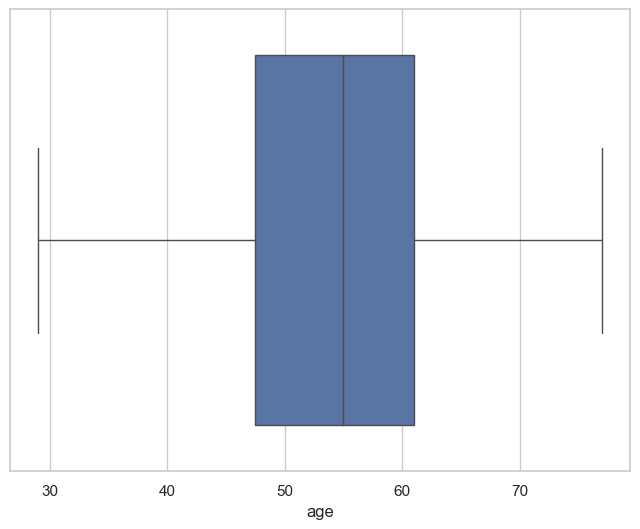

In [61]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.boxplot(x=df['age'])
plt.show()

## trestbps Variable

In [62]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

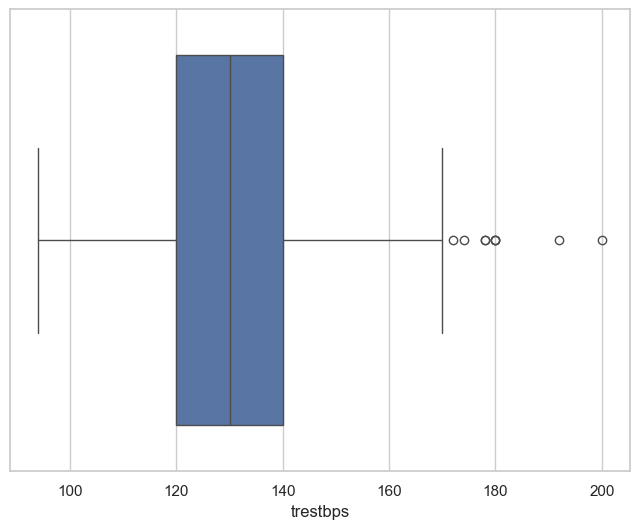

In [63]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x=df['trestbps'])
plt.show()

## `chol` Variable

In [64]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

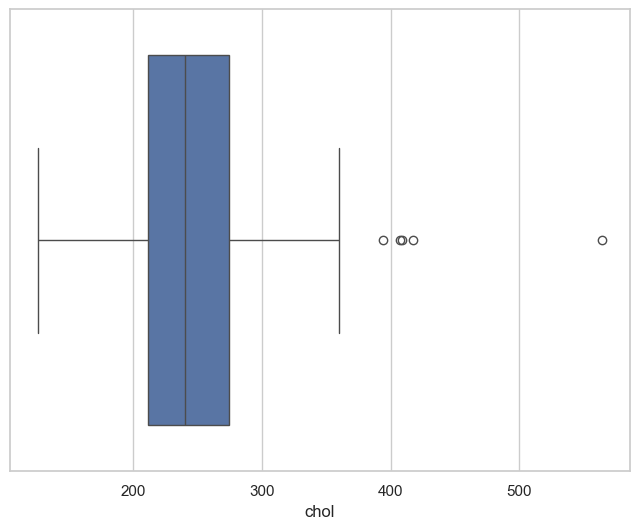

In [65]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.boxplot(x=df['chol'])
plt.show()

## `thalach` Variable

In [66]:
df['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

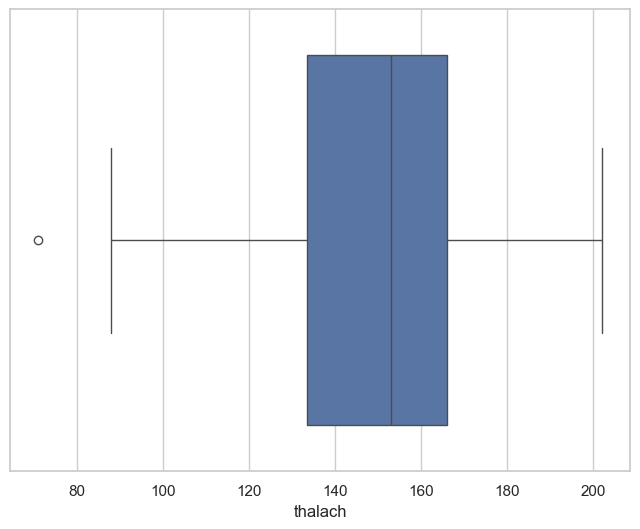

In [67]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.boxplot(x=df['thalach'])
plt.show()

## `oldpeak` Variable

In [68]:
df['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

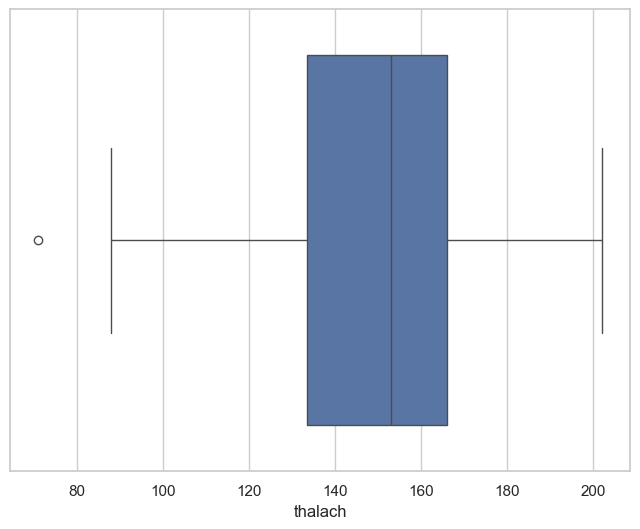

In [69]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.boxplot(x=df['thalach'])
plt.show()

**Summary of Outlier Detection**

- **age**  
   No outliers found.

- **trestbps (Resting Blood Pressure)**  
   Outliers on the higher side.

- **chol (Cholesterol)**  
   Outliers on the higher side.

- **thalach (Maximum Heart Rate Achieved)**  
   One outlier on the lower side.

- **oldpeak (ST Depression)**  
   Outliers on the higher side.

**Note:** Variables with outliers may need further investigation or handling.


# Conclusion

So, friends, our **EDA journey** has come to an end. 

In this notebook, we explored the **Heart Disease dataset** and applied many of the strategies from the book *Think Stats – Exploratory Data Analysis in Python* by **Allen B. Downey**.

**Key Highlights:**
- Focused on the **target variable** and analyzed its behavior.
- Investigated its interactions with other features using **univariate**, **bivariate**, and **multivariate** analysis.
- Used various visualizations like histograms, boxplots, scatter plots, and heatmaps.
- Detected and interpreted **missing values** using `isnull()` functions.
- Used **assertions** to validate data integrity.
- Performed **outlier detection** and summarized key findings.

I hope you enjoyed this kernel and found it helpful on your data analysis journey.

**Thank you!**
